In [1]:
data = "C:/Users/ISHMO_CT/Desktop/projects/Lumino_AI_back_end/data/creditcard.csv"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(data)

In [14]:
new_columns = ["Time", "Transaction_Frequency", "Transaction_Type", "Merchant_Category", 
    "Relative_Transaction_Amount", "Card_Verification_Result", "Declined_Transactions", 
    "Time_Since_Last_Transaction", "Device_Used", "Transaction_Location", "IP_Risk_Score", 
    "Spending_Behavior", "Past_Fraud_History", "ATM_Withdrawal", "Distance_Between_Transactions", 
    "High_Risk_Location", "Transaction_Time_of_Day", "Cardholder_Age_Group", "Linked_Accounts", 
    "Transaction_Velocity", "IP_Geo_Risk", "Account_Age", "Device_Fingerprint_Risk", 
    "Email_Risk_Score", "Chargebacks", "Approval_Rate", "Recurring_Payment", "International_Usage", 
    "Payment_Method", "Amount", "Class"]

In [15]:
df.columns = new_columns

In [16]:
df.head()

,Time,Transaction_Frequency,Transaction_Type,Merchant_Category,Relative_Transaction_Amount,Card_Verification_Result,Declined_Transactions,Time_Since_Last_Transaction,Device_Used,Transaction_Location,...,Account_Age,Device_Fingerprint_Risk,Email_Risk_Score,Chargebacks,Approval_Rate,Recurring_Payment,International_Usage,Payment_Method,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Class"].drop("Class").sort_values(ascending=False)
print("Feature correlation with target:", correlation_with_target)

Feature correlation with target: Spending_Behavior                0.154876
Relative_Transaction_Amount      0.133447
Transaction_Type                 0.091289
Account_Age                      0.040413
Transaction_Velocity             0.034783
IP_Geo_Risk                      0.020090
Device_Used                      0.019875
International_Usage              0.017580
Payment_Method                   0.009536
Amount                           0.005632
Recurring_Payment                0.004455
Approval_Rate                    0.003308
Device_Fingerprint_Risk          0.000805
Email_Risk_Score                -0.002685
High_Risk_Location              -0.004223
ATM_Withdrawal                  -0.004570
Chargebacks                     -0.007221
Time                            -0.012323
Declined_Transactions           -0.043643
Card_Verification_Result        -0.094974
Transaction_Location            -0.097733
Transaction_Frequency           -0.101347
Linked_Accounts                 -0.111485
T

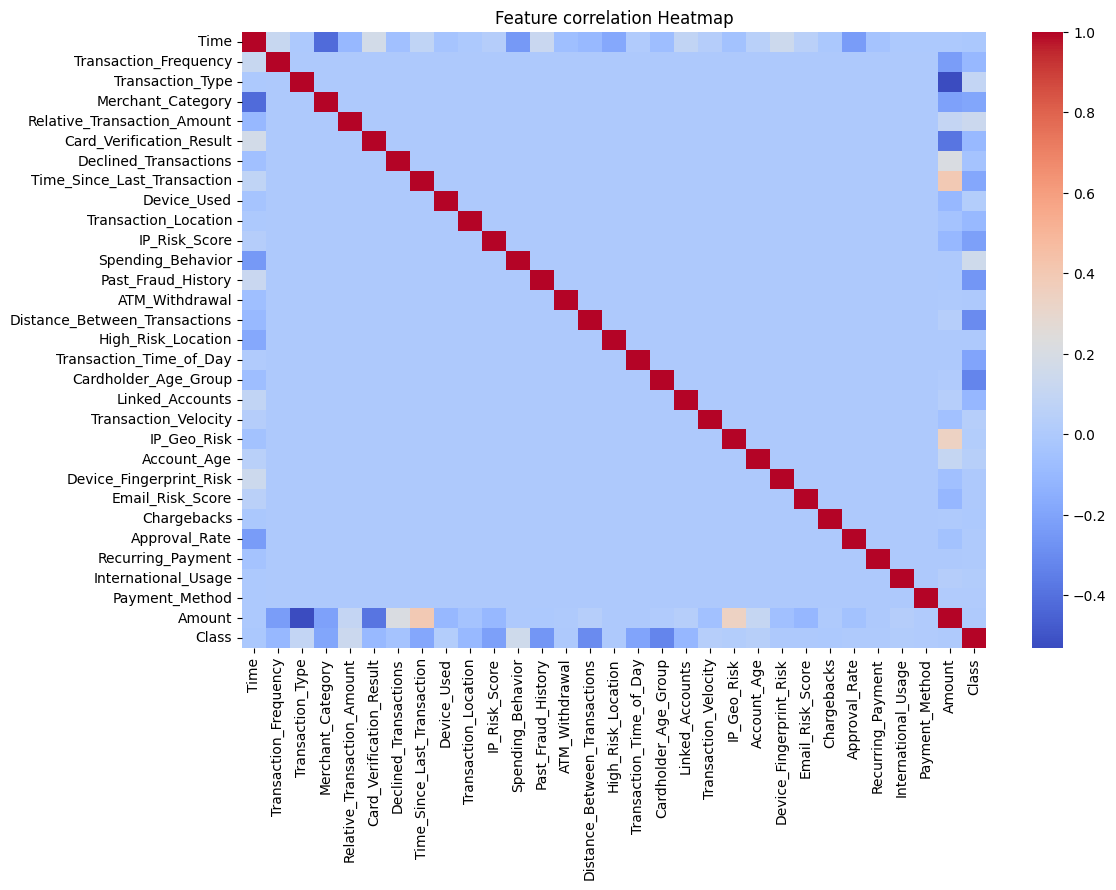

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap = "coolwarm", annot=False)
plt.title("Feature correlation Heatmap")
plt.show()

In [27]:
low_corr_columns = correlation_with_target[(correlation_with_target > -0.05) & (correlation_with_target < 0.05)].index
low_corr_columns

Index(['Account_Age', 'Transaction_Velocity', 'IP_Geo_Risk', 'Device_Used',
       'International_Usage', 'Payment_Method', 'Amount', 'Recurring_Payment',
       'Approval_Rate', 'Device_Fingerprint_Risk', 'Email_Risk_Score',
       'High_Risk_Location', 'ATM_Withdrawal', 'Chargebacks', 'Time',
       'Declined_Transactions'],
      dtype='object')

In [29]:
df_cleaned = df.drop(columns=low_corr_columns)
df_cleaned

,Transaction_Frequency,Transaction_Type,Merchant_Category,Relative_Transaction_Amount,Card_Verification_Result,Time_Since_Last_Transaction,Transaction_Location,IP_Risk_Score,Spending_Behavior,Past_Fraud_History,Distance_Between_Transactions,Transaction_Time_of_Day,Cardholder_Age_Group,Linked_Accounts,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0


In [35]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_info)


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [38]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.05)  # contamination is the expected percentage of outliers

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(df.select_dtypes(include=['float64', 'int64']))

# Convert the result to a boolean array (1 means normal, -1 means outlier)
outliers = outliers == -1

# Add outlier information to the dataframe
df['outlier'] = outliers

# Print outlier rows
print(df[outliers])


            Time  Transaction_Frequency  Transaction_Type  Merchant_Category  \
7            7.0              -0.644269          1.417964           1.074380   
18          14.0              -5.401258         -5.450148           1.186305   
51          36.0              -1.004929         -0.985978          -0.038039   
82          52.0              -3.005237          2.600138           1.483691   
83          53.0              -1.198968         -1.474100           1.840326   
...          ...                    ...               ...                ...   
284649  172642.0             -11.946976          9.772660          -8.006237   
284721  172710.0              -2.516013          2.481932          -0.683786   
284772  172760.0              -6.713826          2.369104          -3.534768   
284795  172778.0             -12.516732         10.187818          -8.476671   
284802  172786.0             -11.881118         10.071785          -9.834783   

        Relative_Transaction_Amount  Ca

In [55]:
target = df_cleaned["Class"]
X = df_cleaned.drop(target)
y = target

In [59]:
# drop extra two rowa in y 
y = y.iloc[:-2]

In [61]:
print(len(X))
print(len(y))

284805
284805


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("classification report", classification_report(y_test, y_pred))

accuracy_score 0.9983497480732431
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.50      0.02      0.04        94

    accuracy                           1.00     56961
   macro avg       0.75      0.51      0.52     56961
weighted avg       1.00      1.00      1.00     56961

